### Tarefa Grafos I 

<p>Importar paquetes necesarios</p>

In [131]:
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt

<a href="https://www.kaggle.com/datasets/thedevastator/global-air-transportation-network-mapping-the-wo">Dataset de rutas aéreas</a>
<p>Cargar Dataset</p>


In [ ]:

rutas = pd.read_csv('routes.csv')

aeropuertos = pd.read_csv('airports.csv',
    na_values='\\N',index_col=5) # Hacemos que el índice sea el IATA para poder relacionarlo con el csv de las rutas.


<p> Editamos nuestro Dataset</p>

In [136]:
aeropuertos_es = aeropuertos[aeropuertos['Country'] == 'Spain'] # Obtenemos solo los aeropuertos de España

print(aeropuertos_es.head(10)) # mostrar aeropuertos españoles

rutas_es = rutas[ # Obtenemos las rutas que sean entres aeropuertos ubicados en España.
    rutas['Source airport'].isin(aeropuertos_es.index) &
    rutas['Destination airport'].isin(aeropuertos_es.index)
] 

print(rutas_es.head(10)) # mostrar rutas españolas


      index  Airport ID                            Name  \
IATA                                                      
FUE    1028        1051           Fuerteventura Airport   
VDE    1029        1052                  Hierro Airport   
SPC    1030        1053                La Palma Airport   
LPA    1031        1054            Gran Canaria Airport   
ACE    1032        1055               Lanzarote Airport   
TFS    1033        1056          Tenerife South Airport   
TFN    1034        1057          Tenerife Norte Airport   
MLN    1035        1058                 Melilla Airport   
ABC    1180        1211     Albacete-Los Llanos Airport   
ALC    1181        1212  Alicante International Airport   

                        City Country  ICAO   Latitude  Longitude  Altitude  \
IATA                                                                         
FUE            Fuerteventura   Spain  GCFV  28.452700 -13.863800        85   
VDE                   Hierro   Spain  GCHI  27.814800 -17

<p>Obtenemos los nodos</p>

In [139]:

nodos = rutas_es[['Source airport', 'Destination airport']].values

g = nx.from_edgelist(nodos)

print(nodos)
print 

[['LPA' 'MAD']
 ['ACE' 'FUE']
 ['AGP' 'PMI']
 ...
 ['XRY' 'BCN']
 ['AGP' 'MLN']
 ['MLN' 'AGP']]


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

<p>Renombro los nodos para que sea más entendible</p>

In [140]:
# Crear un diccionario para mapear códigos IATA a nombres de ciudades
iata_to_city = aeropuertos_es['City'].to_dict()

# Renombrar nodos del grafo
g = nx.relabel_nodes(g, iata_to_city)


<p>Visualizamos el grafo</p>

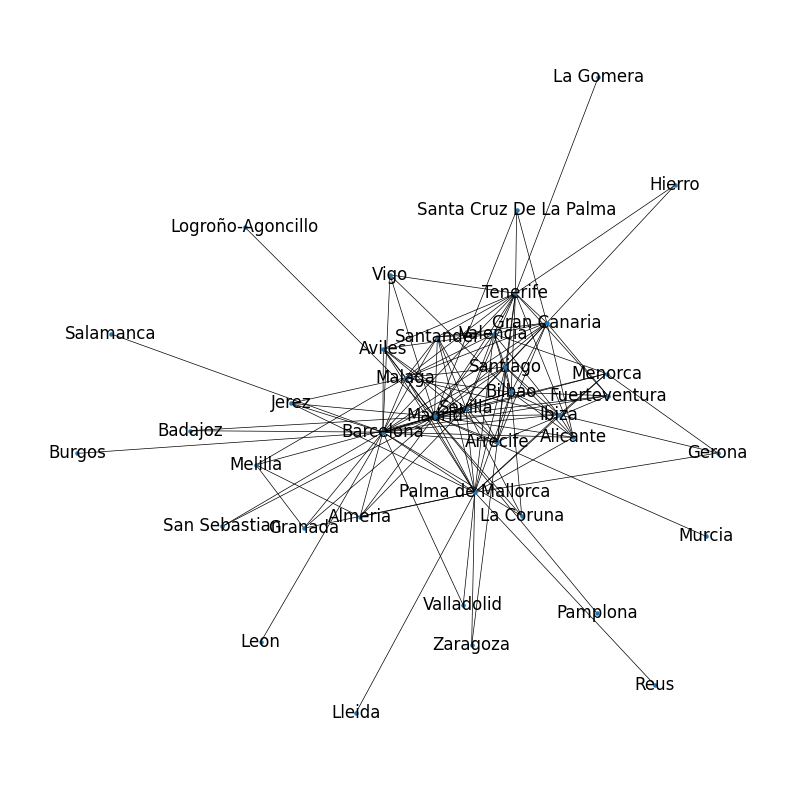

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
nx.draw_networkx(g, ax=ax, node_size=5,
                 font_size=12, alpha=1,
                 width=.5)
ax.set_axis_off()